In [1]:
from analysis_functions import * 


2025-04-03 19:23:25.697732: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 19:23:25.701756: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 19:23:25.716632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-03 19:23:25.741770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-03 19:23:25.749674: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-03 19:23:27.391983: W tensorflow/compiler/tf2tensorrt/utils/p

### Read data

In [3]:


number = 1   #from 0 to 196
characteristic = 19 #from 01 to 22
up_to_files = 50


ids_sat = [2, 3, 4, 5, 6, 7, 8, 9, 13, 16,
     17, 18, 22, 23, 24, 25, 26, 28, 29, 30,
     33, 36, 38, 39, 40, 42, 43, 44, 46, 48,
     49, 50, 51, 57, 65, 67, 68, 69, 71, 72,
     73, 74, 77, 78, 79, 81, 82, 85, 87, 88,
     89, 90, 92, 93, 94, 96, 99, 103, 104, 107,
     109, 110, 111, 112, 114, 115]



principal_path = "../../data/" #You must to add "/" at the end of the path eg. /data + / = /data/
final_string = '_' + f"{number:03d}" + '.npy'

# List of file paths to .npy files
variables= [
    #Characteristic          #Number of characteristic

    'bytes',                 #00 
    'center_frequency',      #01
    'confidence',            #02
    'direction',             #03
    'level',                 #04
    'magnitude',             #05 
    'msg',                   #06
    'msg_id',                #07
    'msg_type',              #08
    'n_symbols',             #09
    'noise',                 #10
    'ra_alt',                #11
    'ra_cell',               #12 ID Transmitters
    'ra_lat',                #13
    'ra_lon',                #14
    'ra_sat',                #15 ID satellite
    'run_id',                #16 
    'sample_count',          #17
    'sample_rate',           #18
    'samples',               #19 IQ samples
    'timestamp',             #20
    'timestamp_global',      #21
    'uw_start'               #22
]

#create an array with the files names involved in the original dataset 
# eg. ['../../data/bytes_001.npy', '../../data/center_frequency_001.npy', '../../data/confidence_001.npy', ...]
file_paths = add_string_to_vector(principal_path, variables, final_string) 


Valor = np.load(file_paths[characteristic]) #Load the characteristics values asociated 

title = '../first-probes/plots/plot_'+variables[characteristic]+ '_' + f"{number:03d}" 

information_data(file_paths) # Show the information of each characterstic (file_paths/ variables)

#analyze_data_1d(Valor, size=10000,plot_name = title)


#data = analyze_data_1d(Valor,plot_name = title)

#not_common_in_A, not_common_in_B, _ = find_not_common_elements(data, ids_sat) #use this with characteristic = 15 
#print("Elements in Data but not in ID_Sat:", not_common_in_A)
#print("Elements in ID_Sat but not in Data:", not_common_in_B)

#show_unique_and_repeated_elements(data)

all_values = []
all_id_values = []
all_cell_values = []
cell = 12 #from 01 to 22
id_sat = 15 
num_cells=63

for number in list(range(0, up_to_files, 1)):
    final_string = '_' + f"{number:03d}" + '.npy'
    file_paths = add_string_to_vector(principal_path, variables, final_string)
    value_cell = np.load(file_paths[cell])
    value_sat = np.load(file_paths[id_sat])
    Valor_ = (value_sat * num_cells) + value_cell

    all_id_values.extend(value_sat)
    all_cell_values.extend(value_cell)
    all_values.extend(Valor_)


#show_unique_and_repeated_elements(all_id_values)   # ID Satellite
#show_unique_and_repeated_elements(all_cell_values) # ID Transmitters
#show_unique_and_repeated_elements(all_values)      # ID Unique Transmitters


"""
all_id = show_unique_and_repeated_elements(all_values)
print(all_id)
print('total de elementos: {}'.format(len(all_id)))
"""
"""
result = find_not_common_elements(all_id_values, ids_sat)
not_common_in_A, not_common_in_B, common_in_AB = result
print("Elements in all_id but not in ID_Sat:", not_common_in_A)
print("Elements in ID_Sat but not in all_id:", not_common_in_B)
print("Elements in ID_Sat common in all_id:", common_in_AB)
"""


# analyze_data_3d(Valor, 1, title) #It must be used only with file number 19


#tfrecord_file = principal_path + 'tfrecord/data-0.tfrecord'
#explore_tfrecord(tfrecord_file)


File: ../../data/bytes_001.npy
Type of data: <class 'numpy.ndarray'>
Shape of data: (10000, 111)
Data type of elements: uint8
Number of dimensions (axes): 2
Total number of elements: 1110000
Numerical Statistics:
Min value: 0
Max value: 255

File: ../../data/center_frequency_001.npy
Type of data: <class 'numpy.ndarray'>
Shape of data: (10000,)
Data type of elements: int64
Number of dimensions (axes): 1
Total number of elements: 10000
Numerical Statistics:
Min value: 1618095360
Max value: 1626472448

File: ../../data/confidence_001.npy
Type of data: <class 'numpy.ndarray'>
Shape of data: (10000,)
Data type of elements: int64
Number of dimensions (axes): 1
Total number of elements: 10000
Numerical Statistics:
Min value: 46
Max value: 100

File: ../../data/direction_001.npy
Type of data: <class 'numpy.ndarray'>
Shape of data: (10000,)
Data type of elements: int64
Number of dimensions (axes): 1
Total number of elements: 10000
Numerical Statistics:
Min value: 1
Max value: 1

File: ../../dat

'\nresult = find_not_common_elements(all_id_values, ids_sat)\nnot_common_in_A, not_common_in_B, common_in_AB = result\nprint("Elements in all_id but not in ID_Sat:", not_common_in_A)\nprint("Elements in ID_Sat but not in all_id:", not_common_in_B)\nprint("Elements in ID_Sat common in all_id:", common_in_AB)\n'

Unique elements in the list - Size: 4123:
[0, 1, 2, 4, 6, 9, 11, 12, 16, 20, 27, 32, 34, 35, 36, 37, 41, 42, 43, 48, 52, 63, 64, 65, 66, 67, 69, 73, 78, 80, 83, 86, 87, 94, 95, 99, 106, 109, 110, 112, 119, 120, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 190, 191, 194, 195, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 243, 245, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 315, 316, 318, 319, 320, 321, 322, 323, 324, 327, 328, 329, 330, 331,

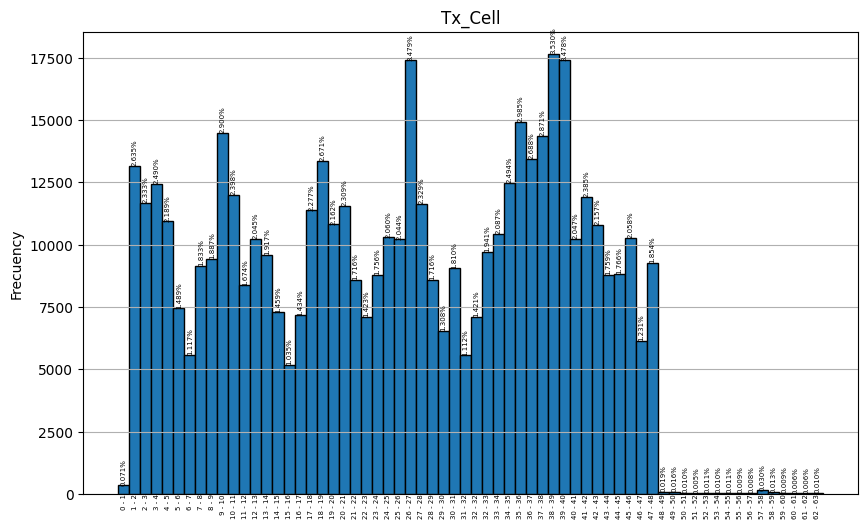

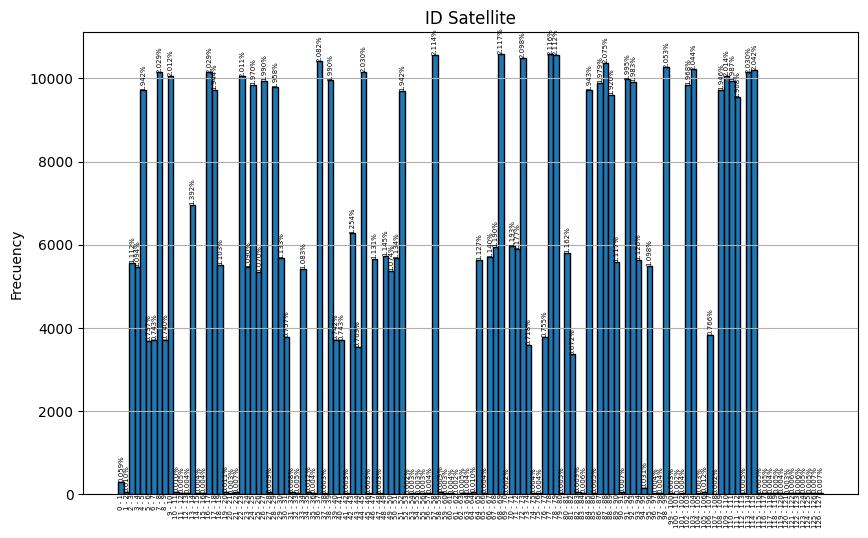

'\n#CHARACTERISTICS ANALISIS OF EACH SIGNAL OF THE DATA SET\nsufix = 1\nsample = 0  #0 - 9999\nsample_frequency = 25e6 \n\nsamples = load_samples(data_dir,f"{sufix:03d}")\n\ni_samples = samples[sample,:,0]\nq_samples = samples[sample,:,1]\n\ndf = pd.DataFrame(np.array([i_samples, q_samples]).T, columns=[\'i\', \'q\'])\ndf.to_csv(\'senial.csv\')\n'

In [4]:
plot_dir = "../plots/data/"
data_base = "../../data/"
up_to_files = 50
data_dir = data_base

suffixes = [f"{i:03d}" for i in range(up_to_files)] # up to 170


ids_sat = [2, 3, 4, 5, 6, 7, 8, 9, 13, 16,
     17, 18, 22, 23, 24, 25, 26, 28, 29, 30,
     33, 36, 38, 39, 40, 42, 43, 44, 46, 48,
     49, 50, 51, 57, 65, 67, 68, 69, 71, 72,
     73, 74, 77, 78, 79, 81, 82, 85, 87, 88,
     89, 90, 92, 93, 94, 96, 99, 103, 104, 107,
     109, 110, 111, 112, 114, 115]

#ANALISIS OF THE DATASET ID's

ids_array, cells_array, id_cells_array = load_data_all(data_dir, suffixes)


show_unique_and_repeated_elements(id_cells_array)

plot_hist(cells_array,bins = 64, title='Tx_Cell', col_labels = True, procent=True)
plot_hist(ids_array, bins =128, title='ID Satellite', col_labels = True, procent=True)
#plot_hist(id_cells_array, bins = 128, title='Unique ID TX', col_labels = True, procent=True) 
#plot_hist(id_cells_array, bins = 8060, title='ID Transmitter per each Satellite', col_labels = False)


'''
result = numbers_above_threshold(ids_array, threshold = 5000)

resultb = find_not_common_elements(result[:,0], ids_sat)
not_common_in_A, not_common_in_B, common_in_AB = resultb
print("Elements in all_id but not in ID_Sat:", not_common_in_A)
print("Elements in ID_Sat but not in all_id:", not_common_in_B)
'''
'''
#CHARACTERISTICS ANALISIS OF EACH SIGNAL OF THE DATA SET
sufix = 1
sample = 0  #0 - 9999
sample_frequency = 25e6 

samples = load_samples(data_dir,f"{sufix:03d}")

i_samples = samples[sample,:,0]
q_samples = samples[sample,:,1]

df = pd.DataFrame(np.array([i_samples, q_samples]).T, columns=['i', 'q'])
df.to_csv('senial.csv')
'''

In [12]:
data_dir = "../../data/"
suffixes = [f"{i:03d}" for i in range(170)]

sufix = 3
sample = 2  #0 - 9999
sample_frequency = 25e6 

samples = load_samples(data_dir,f"{sufix:03d}")
id, cells = load_data(data_dir,f"{sufix:03d}")
id_tx = get_id_cell


#print(id.shape)

i_signals = samples[:,:,0]
q_signals = samples[:,:,1]

i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

def build_dict_signal (signal, id):
    dict_sinal= defaultdict(list)
    for ii, label in enumerate(id):
        dict_sinal[label].append(signal[ii])
    print('dictionary created')
    return dict_sinal

dict_sinal_i = build_dict_signal(i_signals, id)
dict_sinal_q = build_dict_signal(q_signals, id)
dict_sinal_iq =build_dict_signal(samples, id)

def print_all_signals(dict_signal):
    for ii in sorted(list(dict_signal.keys())):
        fig, ax = plt.subplots(figsize=(12,3))
        signals = dict_signal.get(ii)
        for i in range(len(signals)):
            ax.plot(signals[i])
            ax.set_title(f'{ii} and Total of Signals {len(signals)}')
        plt.show()

#plot_hist(id, bins = 128, title = 'Histogram', col_labels = True, procent= False)
#plot_hist(cells, bins = 64, title = 'Histogram', col_labels = True, procent= False)
print(dict_sinal_iq.keys())
#print_all_signals(dict_sinal_i)

"""
# Example how to acces to the IQ dictonary 

# Assuming dict_sinal_iq is a dictionary where each key maps to a list of IQ numpy arrays.

# Print all the keys in the dictionary dict_sinal_iq.
print(dict_sinal_iq.keys())

# Get the value associated with the key 17 from the dictionary. This value is expected to be a list of numpy arrays.
value = dict_sinal_iq.get(17)

# Print the first column of the 31st numpy array (index 30) in the list associated with the key 17.
print(value[30][:, 0])

# Print the second column of the 31st numpy array (index 30) in the list associated with the key 17.
print(value[30][:, 1])

# Plot the first column of the 3rd numpy array (index 2) in the list associated with the key 17.
plt.plot(value[2][:, 0])

# Plot the second column of the 3rd numpy array (index 2) in the list associated with the key 17.
plt.plot(value[2][:, 1])

# Display the plot with the two lines created above.
plt.show()

"""

dictionary created
dictionary created
dictionary created
dict_keys([50, 78, 48, 104, 115, 71, 55, 28, 88, 87, 85, 67, 31, 79, 81, 73, 1, 42, 92, 89, 33, 69, 72, 99, 2, 65, 123, 57, 45, 29, 36, 110, 68, 0, 44, 43, 34, 11, 25, 127, 46, 16, 18, 112, 90, 30, 113, 17, 49, 76, 3, 26, 32, 23, 103, 40, 96, 4, 94, 114, 13, 22, 6, 63, 8, 7, 9, 41, 60, 24, 38, 10, 97, 101])


'\n# Example how to acces to the IQ dictonary \n\n# Assuming dict_sinal_iq is a dictionary where each key maps to a list of IQ numpy arrays.\n\n# Print all the keys in the dictionary dict_sinal_iq.\nprint(dict_sinal_iq.keys())\n\n# Get the value associated with the key 17 from the dictionary. This value is expected to be a list of numpy arrays.\nvalue = dict_sinal_iq.get(17)\n\n# Print the first column of the 31st numpy array (index 30) in the list associated with the key 17.\nprint(value[30][:, 0])\n\n# Print the second column of the 31st numpy array (index 30) in the list associated with the key 17.\nprint(value[30][:, 1])\n\n# Plot the first column of the 3rd numpy array (index 2) in the list associated with the key 17.\nplt.plot(value[2][:, 0])\n\n# Plot the second column of the 3rd numpy array (index 2) in the list associated with the key 17.\nplt.plot(value[2][:, 1])\n\n# Display the plot with the two lines created above.\nplt.show()\n\n'

### Pandas DataFrame

Señales de la celda 1:
Satélite 36: Señal de shape (11000, 2)
Satélite 36: Señal de shape (11000, 2)
Satélite 36: Señal de shape (11000, 2)
Satélite 36: Señal de shape (11000, 2)
Satélite 36: Señal de shape (11000, 2)
Satélite 36: Señal de shape (11000, 2)
Satélite 36: Señal de shape (11000, 2)
Satélite 36: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Satélite 44: Señal de shape (11000, 2)
Sa

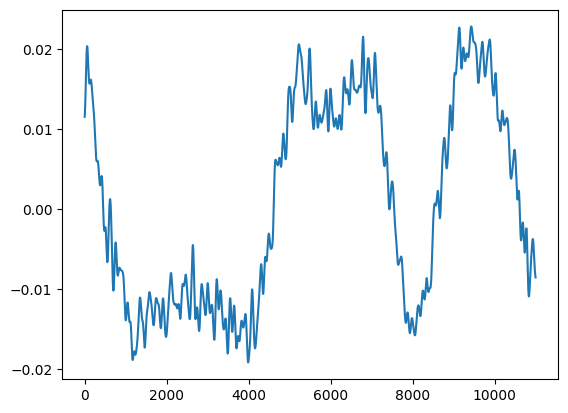

In [13]:
data_dir = "../../data/"
suffixes = [f"{i:03d}" for i in range(170)]

sufix = 1   #0 - 170 / in charlies laptop up to 49

ids_sat = [2, 3, 4, 5, 6, 7, 8, 9, 13, 16,
     17, 18, 22, 23, 24, 25, 26, 28, 29, 30,
     33, 36, 38, 39, 40, 42, 43, 44, 46, 48,
     49, 50, 51, 57, 65, 67, 68, 69, 71, 72,
     73, 74, 77, 78, 79, 81, 82, 85, 87, 88,
     89, 90, 92, 93, 94, 96, 99, 103, 104, 107,
     109, 110, 111, 112, 114, 115]

#ids_cell = list(range(1, 49))
ids_cell = list(range(1, 3))

samples = load_samples(data_dir,f"{sufix:03d}")
ra_sat, ra_cell = load_data(data_dir,f"{sufix:03d}")

# Crear el DataFrame
df = pd.DataFrame({
    'ra_sat': ra_sat,
    'ra_cell': ra_cell,
    'samples': list(samples)  # Guardamos las señales en listas
})

# Indexamos para mejorar la velocidad de búsqueda
df.set_index(['ra_sat', 'ra_cell'], inplace=True)

sat=ids_sat[8]
cell=ids_cell[0]


# Obtener señales de una celda específica y los satélites correspondientes

signals_cell = get_signals(df = df, cell_id=cell)
signals_sat = get_signals(df = df, sat_id=sat)


if signals_cell:
    print(f"Señales de la celda {cell}:")
    for sat_id, signal in signals_cell[:]:  # Mostramos solo las primeras 5 señales
        print(f"Satélite {sat_id}: Señal de shape {signal.shape}")
else:
    print(f"No hay señales para la celda {cell}")
#show_unique_and_repeated_elements(ra_cell)

'''
# Obtener señales de un satélite específico y las celdas correspondientes
if signals_sat:
    print(f"\nSeñales del satélite {sat}:")
    for cell_id, signal in signals_sat[:]:  # Mostramos solo las primeras 5 señales
        print(f"Celda {cell_id}: Señal de shape {signal.shape}")
else:
    print(f"No hay señales para el satélite {sat}")
show_unique_and_repeated_elements(ra_sat)
''' 
print(signal[:,0].shape)
plt.plot(signal[:,1])


